# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#mporting libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data import
data = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [ ]:
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#check for duplicates
len(data[data.duplicated()])

0

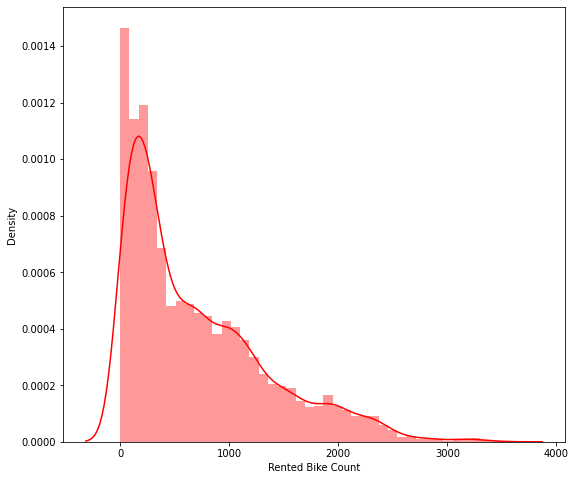

In [ ]:
#data distribution for target variable
plt.figure(figsize=(9,8))
sns.distplot(data['Rented Bike Count'],color="r")

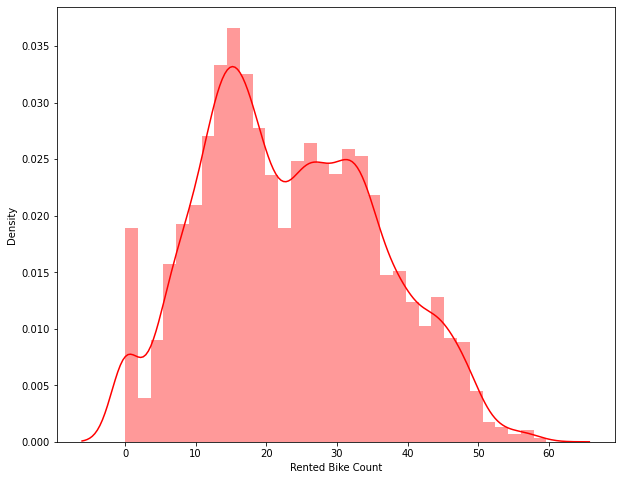

In [ ]:
# square_root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(data['Rented Bike Count']),color="r")

In [ ]:
data_new = data.copy()

In [ ]:
#feature engg to covert days in numeric
days= {'Sunday':7,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

def get_days(x):
  return days[x]


In [ ]:
#Date columns to Date format conversion
data_new['Date']= pd.to_datetime(data_new['Date'])

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column
data_new['Date']=pd.to_datetime(data_new['Date'])
data_new['month'] = data_new['Date'].apply(lambda x : x.month)
data_new['day_of_week'] = data_new['Date'].dt.day_name()


In [ ]:
data_new['weekdays_weekend']=data_new['day_of_week'].apply(lambda x : get_days(x))

In [ ]:
data_new=data_new.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
data_new.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4

In [ ]:
data_new['weekdays_weekend'].unique()

array([4, 7, 3, 5, 1, 6, 2])

In [ ]:
data_new['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
continous_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
continous_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

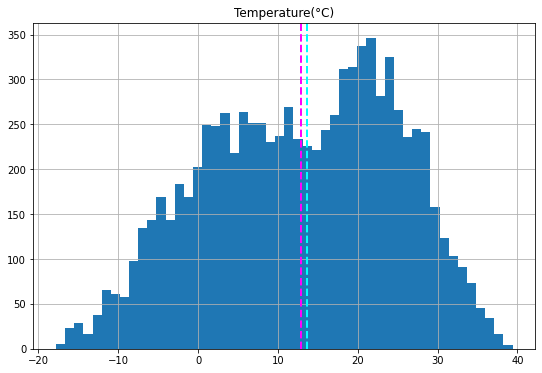

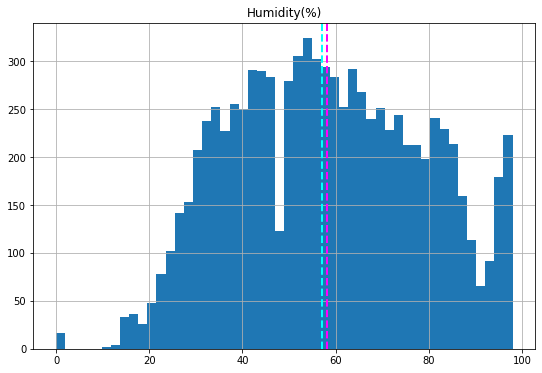

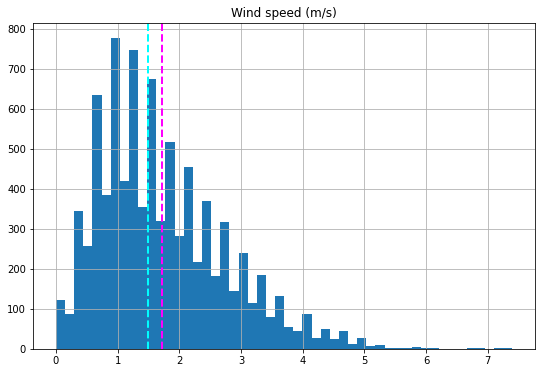

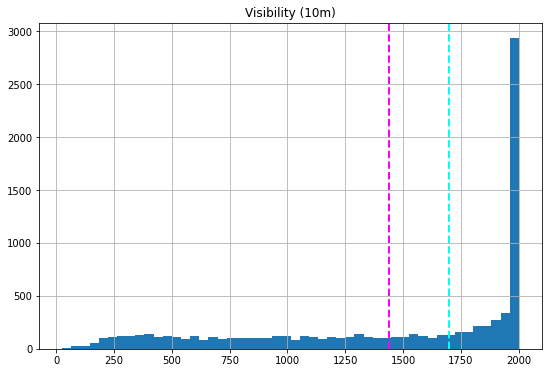

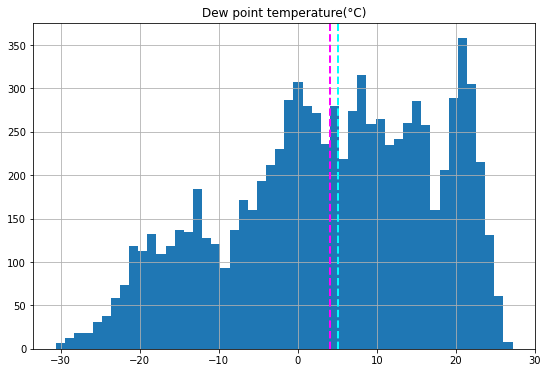

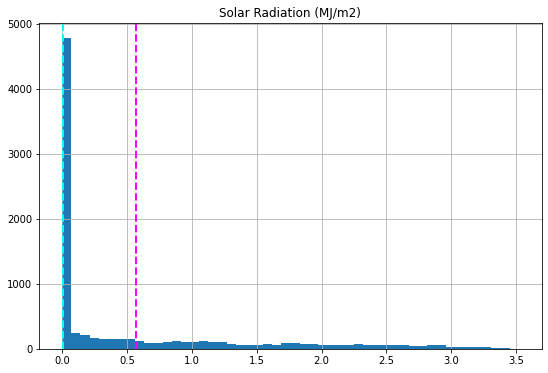

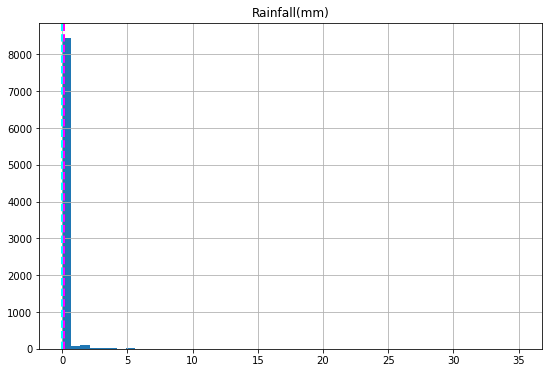

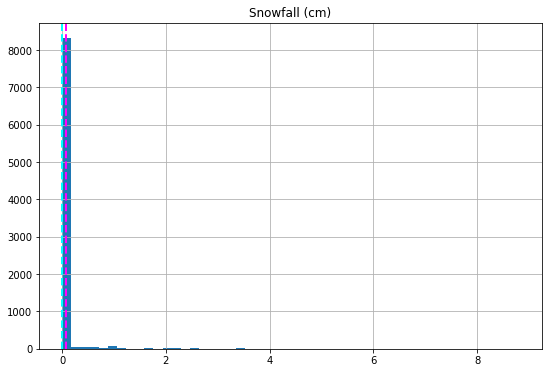

In [ ]:
#check for each features data distribution
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous_feature = data_new[col]
    continous_feature.hist(bins=50, ax = ax)
    ax.axvline(continous_feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(continous_feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

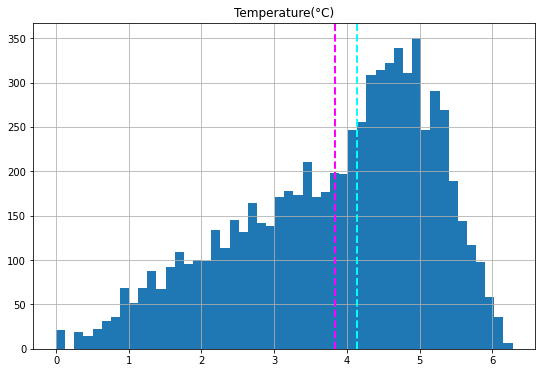

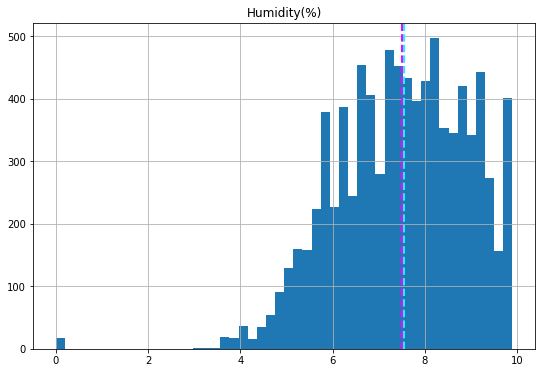

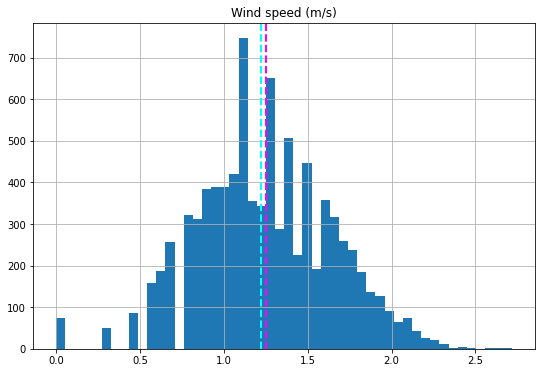

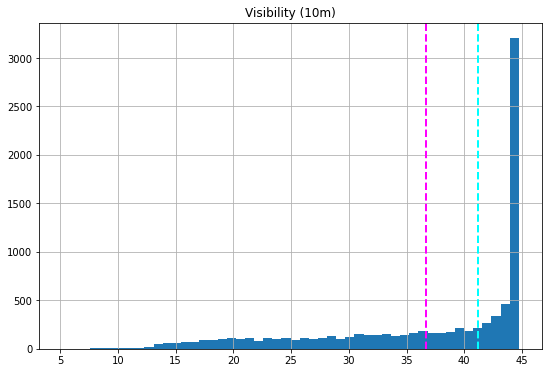

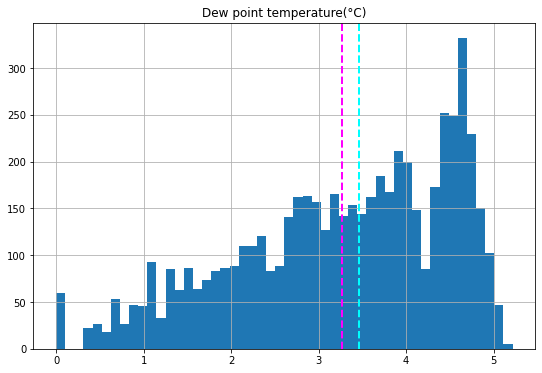

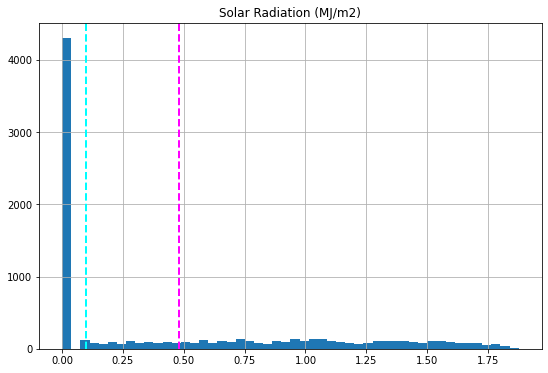

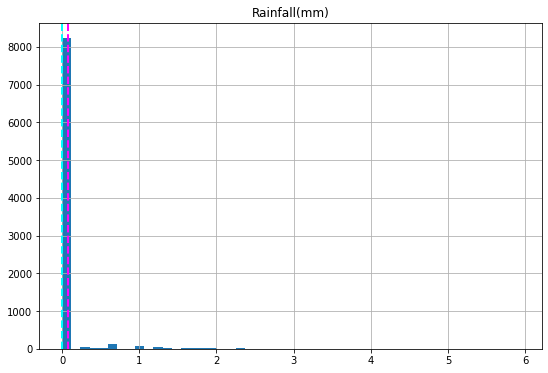

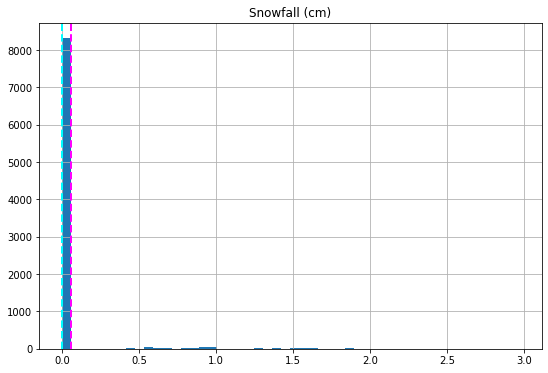

In [ ]:
#check for each continous features data with square root of the values
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous_feature = np.sqrt(data_new[col])
    continous_feature.hist(bins=50, ax = ax)
    ax.axvline(continous_feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(continous_feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

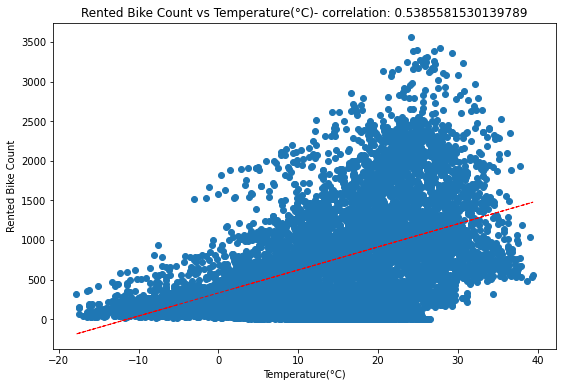

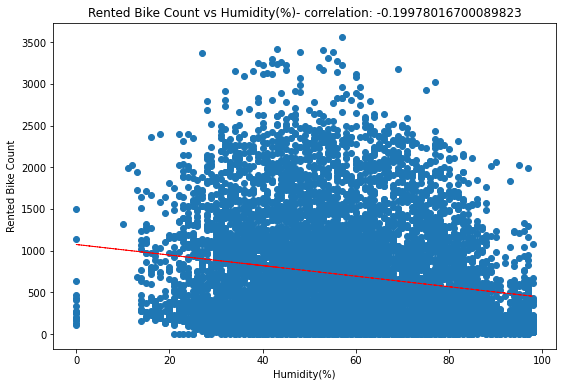

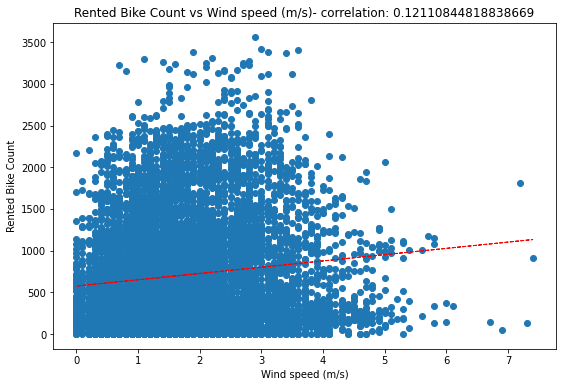

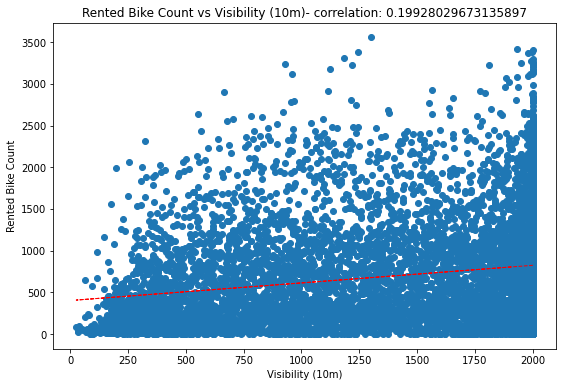

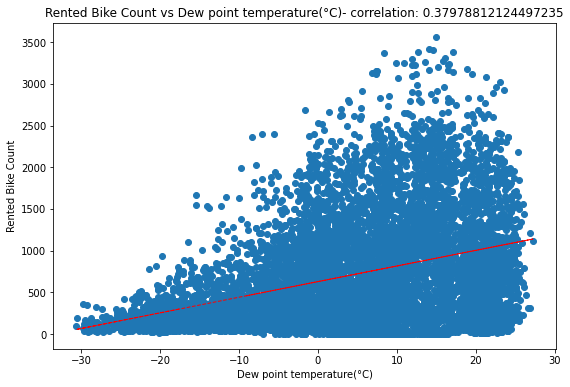

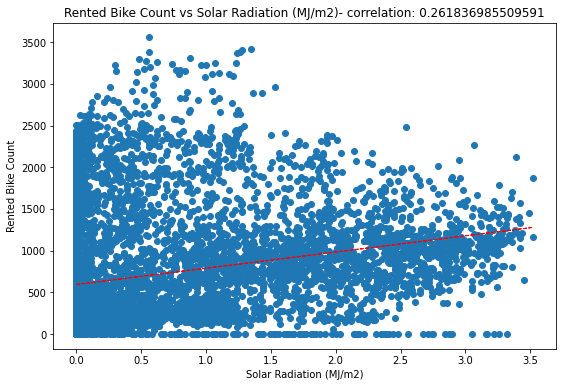

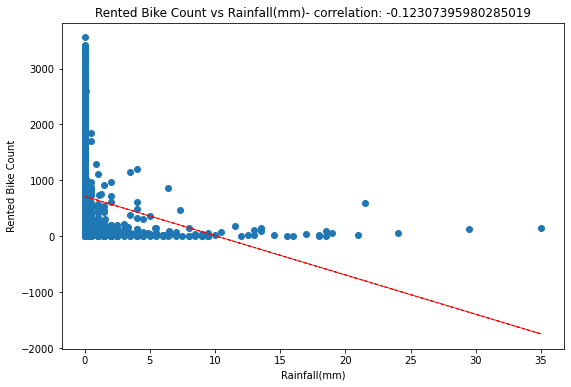

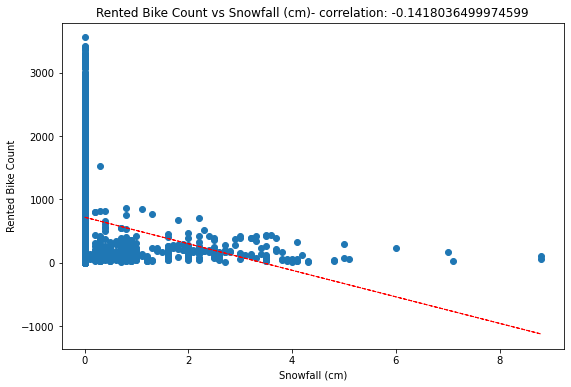

In [ ]:
#check for continous feature vs target variable
for col in continous_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    continous_feature = data_new[col]
    label = data_new['Rented Bike Count']
    correlation = continous_feature.corr(label)
    plt.scatter(x=continous_feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data_new[col], data_new['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data_new[col])

    plt.plot(data_new[col], y_hat, "r--", lw=1)

plt.show()

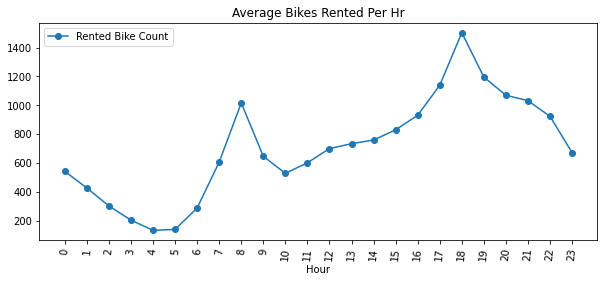

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_new.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(10,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

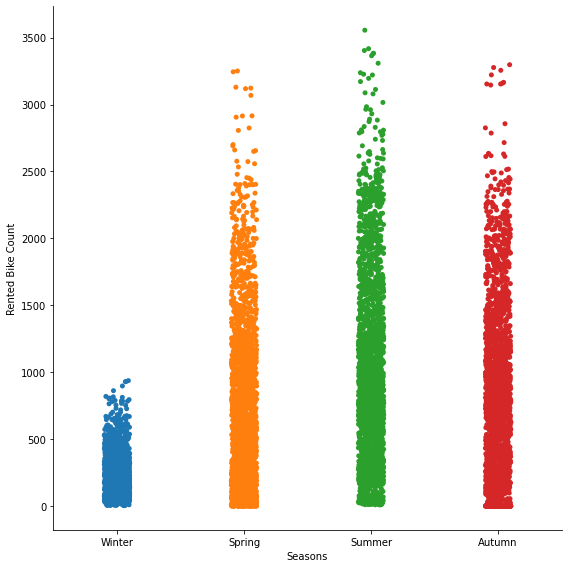

In [ ]:
#plot for rented bike count seasonly
sns.catplot(x='Seasons',y='Rented Bike Count',data=data_new, size=8)

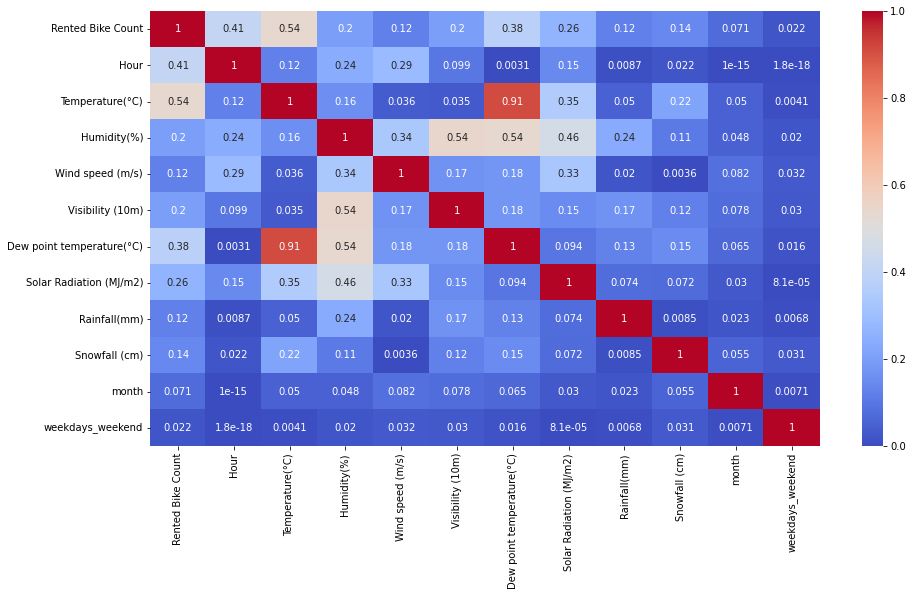

In [ ]:
#check for correlation
plt.figure(figsize=(15,8))
correlation = data_new.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
data_new['temperature'] = 0.5*data_new['Temperature(°C)'] + 0.5*data_new['Dew point temperature(°C)']

In [ ]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continous_feature_df = pd.DataFrame(data_new[continous_features])

In [ ]:
continous_feature_df

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0                -5.2           37               2.2              2000   
1                -5.5           38               0.8              2000   
2                -6.0           39               1.0              2000   
3                -6.2           40               0.9              2000   
4                -6.0           36               2.3              2000   
...               ...          ...               ...               ...   
8755              4.2           34               2.6              1894   
8756              3.4           37               2.3              2000   
8757              2.6           39               0.3              1968   
8758              2.1           41               1.0              1859   
8759              1.9           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8755            0.0  
8756            0.0  
8757            0.0  
8758            0.0  
8759            0.0  

[8760 rows x 8 columns]

In [ ]:
calc_vif(data_new[[i for i in continous_feature_df]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
calc_vif(data_new[[i for i in continous_feature_df if i not in ['Dew point temperature(°C)','Temperature(°C)']]])

variables       VIF
0              Humidity(%)  3.407786
1         Wind speed (m/s)  3.942529
2         Visibility (10m)  4.363892
3  Solar Radiation (MJ/m2)  1.702675
4             Rainfall(mm)  1.077922
5            Snowfall (cm)  1.050516

In [ ]:
data_new.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend',
       'temperature'],
      dtype='object')

In [ ]:
categorical_features = ['Hour','Seasons','Holiday','Functioning Day', 'month', 'weekdays_weekend']

In [ ]:
categorical_features_df= pd.DataFrame(data_new[categorical_features])

In [ ]:
categorical_features_df.head()

Hour Seasons     Holiday Functioning Day  month  weekdays_weekend
0     0  Winter  No Holiday             Yes      1                 4
1     1  Winter  No Holiday             Yes      1                 4
2     2  Winter  No Holiday             Yes      1                 4
3     3  Winter  No Holiday             Yes      1                 4
4     4  Winter  No Holiday             Yes      1                 4

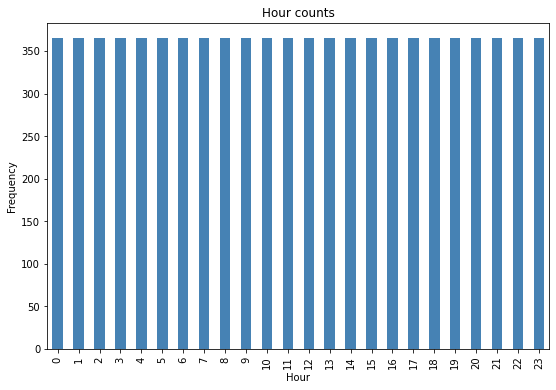

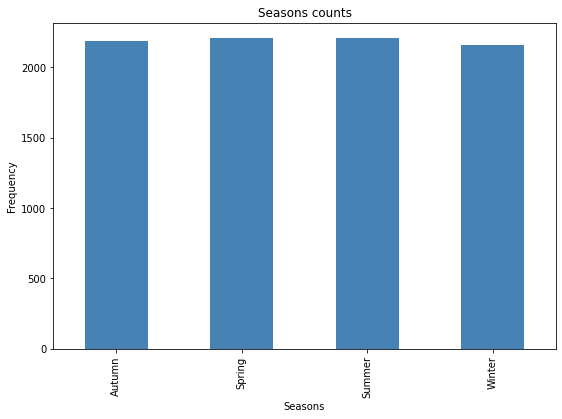

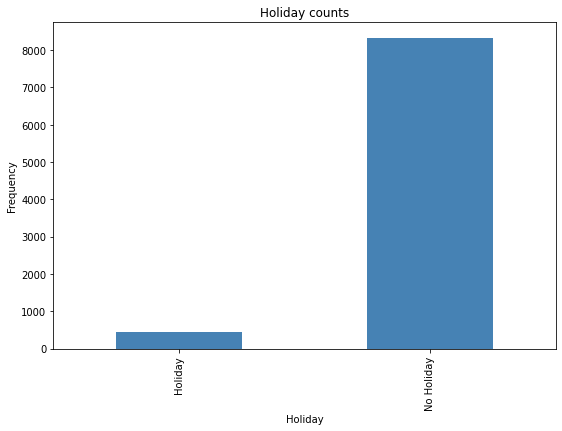

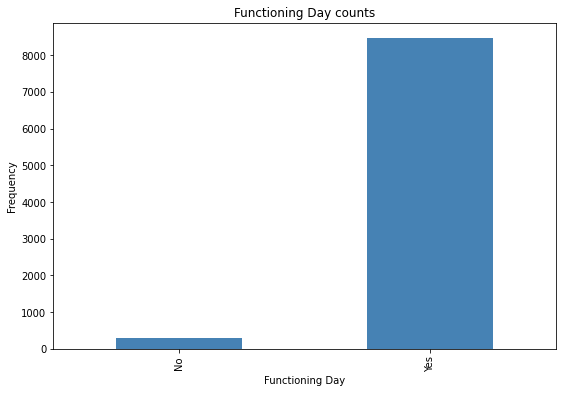

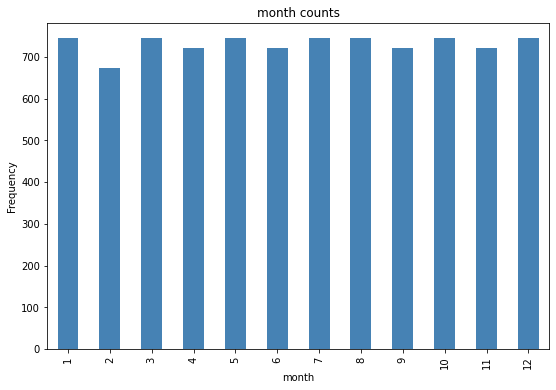

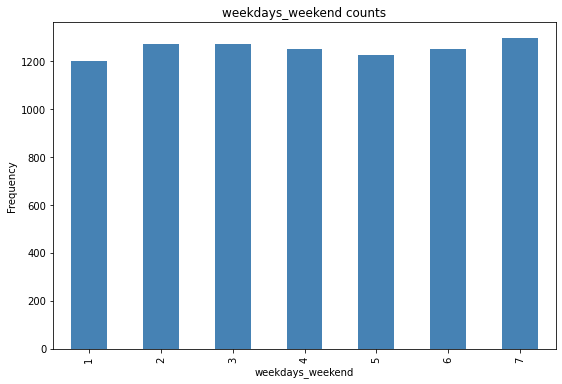

In [ ]:
#check for each categorical features data
for col in categorical_features:
    counts = data_new[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

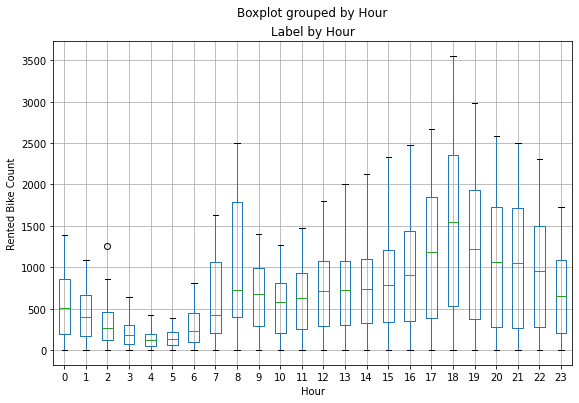

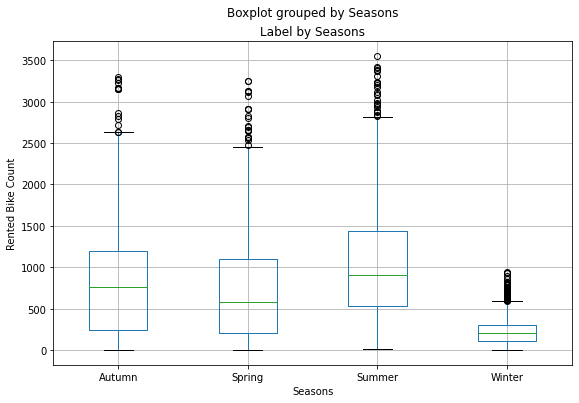

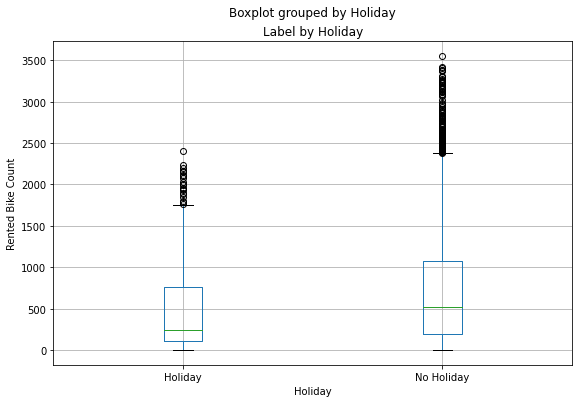

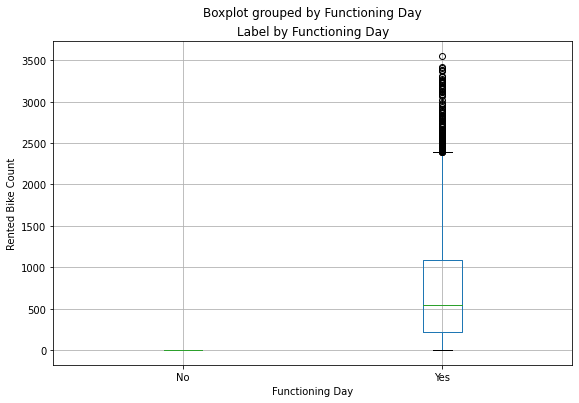

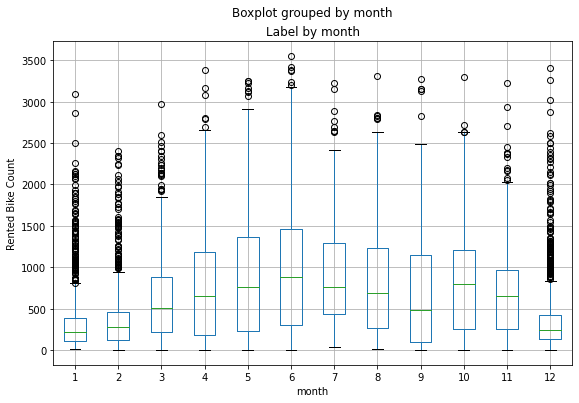

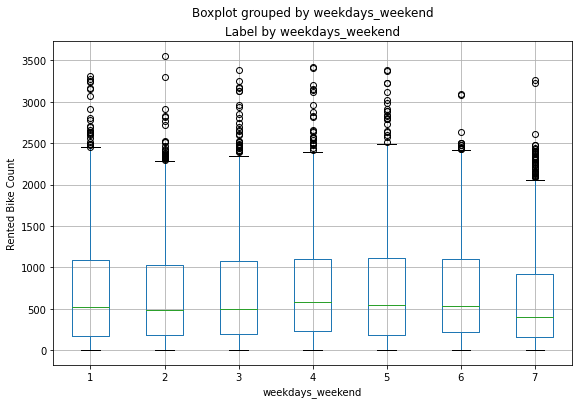

In [ ]:
#check variation of categorical features with target variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data_new.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [ ]:
data_new.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  temperature  
0                 4       -11.40  
1                 4       -11.55  
2                 4       -11.85  
3                 4       -11.90  
4                 4       -12.30

In [ ]:
#Encoding of categorical features
data_new['Holiday'] = data_new['Holiday'].apply(lambda x : 1 if x == 'Holiday' else 0)

In [ ]:
data_new['Functioning Day'] = data_new['Functioning Day'].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
data_new = pd.get_dummies(data_new, columns=["Seasons"], prefix=["season"])

In [ ]:
categorical_features = ['Hour','Holiday','Functioning Day', 'month', 'weekdays_weekend', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']

In [ ]:
continous_final_features = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'temperature']
categorical_final_features = ['Hour','Holiday','Functioning Day', 'month', 'weekdays_weekend', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']

In [ ]:
#final features which are going to be used as independent variable for our models
final_features = continous_final_features + categorical_final_features
final_features

['Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'temperature',
 'Hour',
 'Holiday',
 'Functioning Day',
 'month',
 'weekdays_weekend',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [ ]:
len(final_features)

16

In [ ]:
#transformation of data 
from scipy.stats import zscore
#Train test split
X = data_new[final_features].apply(zscore)

In [ ]:
#sqrt transformation of target variable
y = np.sqrt(data_new['Rented Bike Count'])

In [ ]:
#create a function to compute Evaluation matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
score = pd.DataFrame(index = ['MSE', 'RMSE', 'r2', 'Adjusted r2'])
def get_evaluation_matrix(y_test, y_pred):
  
  MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
  
  RMSE = np.sqrt(MSE)
  
  r2 = r2_score((y_test)**2, (y_pred)**2)
  
  Adj_r2 = 1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
  lst = [MSE, RMSE, r2, Adj_r2]
  return lst

### Splitting train and test data

In [ ]:
#splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


### Linear Regression

In [ ]:
#import linear regressor 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#score
reg.score(X_train, y_train)

0.6544041721880114

In [ ]:
#coefficient values
reg.coef_

array([-4.53479924,  0.12699454,  0.11073158, -0.6609309 , -1.63915897,
        0.04217222,  6.17558595,  3.38637832, -0.61532921,  5.12658397,
        0.26811573, -0.25820841,  1.40222086,  0.29116679,  0.1471647 ,
       -1.84898411])

In [ ]:
#intercept values
reg.intercept_

23.510507518386913

In [ ]:
#prediction for linear regression
y_pred = reg.predict(X_test)

In [ ]:
print(y_pred)

[18.07820594 25.0278095  18.71884026 ... 14.30547383 32.64603517
 20.55490593]


In [ ]:
#Evaluation matrices for linear regression
result = get_evaluation_matrix(y_test,y_pred)
score['Linear regression'] = result
print(score)

             Linear regression
MSE              174696.237393
RMSE                417.966790
r2                    0.582588
Adjusted r2           0.578739


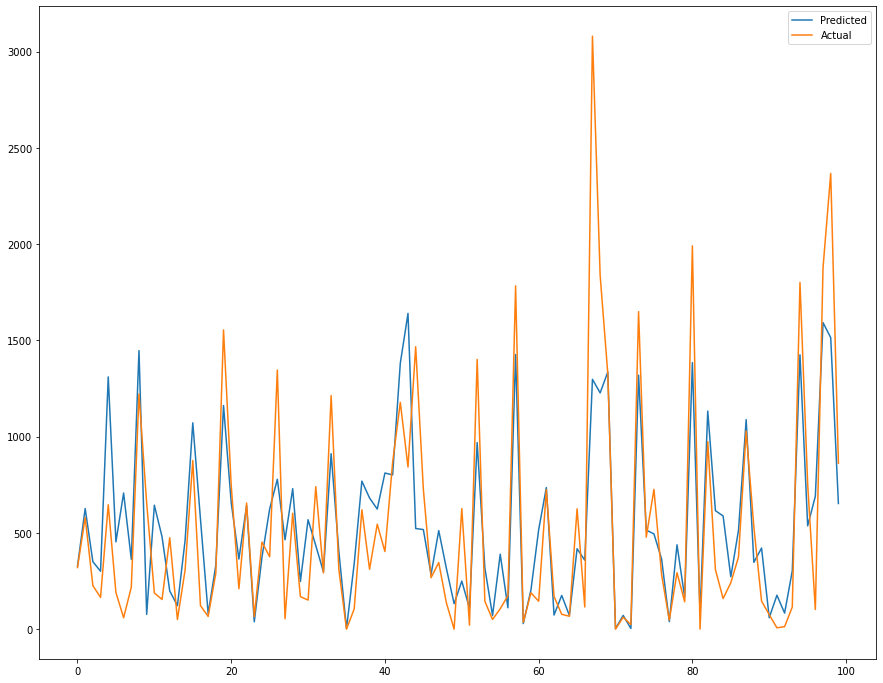

In [ ]:
#plot target test and predicted value for linear regression
plt.figure(figsize=(15,12))
plt.plot((y_pred[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso


In [ ]:
#import Lasso regressor 
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

In [ ]:
lasso.score(X_train, y_train)

0.6543997676917215

In [ ]:
#coefficient values
lasso.coef_

array([-4.51282708,  0.11978996,  0.11014434, -0.63901718, -1.63586914,
        0.03313792,  6.13658802,  3.38784767, -0.6098074 ,  5.11878431,
        0.26189608, -0.25353405,  1.23566045,  0.12001743, -0.        ,
       -2.02217716])

## Lasso using CV


In [ ]:
#import Lasso regressor and grid search cv
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_ = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.61690988843727


In [ ]:
#prediction for Lasso regressio
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for Lasso regression
result = get_evaluation_matrix(y_test,y_pred_lasso)
score['Lasso'] = result
print(score)

             Linear regression          Lasso
MSE              174696.237393  175057.634536
RMSE                417.966790     418.398894
r2                    0.582588       0.581725
Adjusted r2           0.578739       0.577867


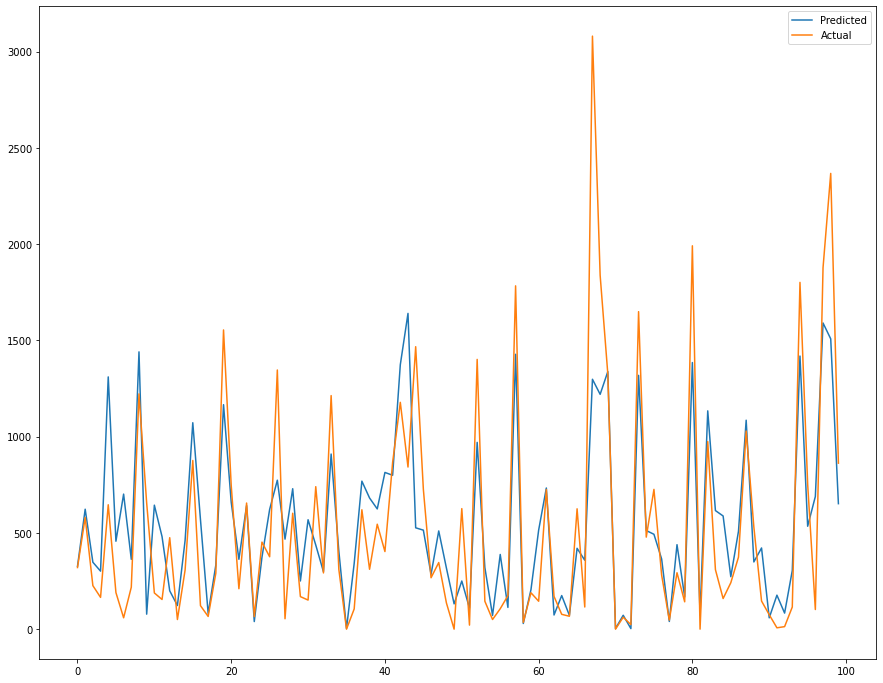

In [ ]:
#plot target test and predicted value for Lasso regression
plt.figure(figsize=(15,12))
plt.plot((y_pred_lasso[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## Ridge


In [ ]:
#import Ridge regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -53.62560559431779


In [ ]:
#prediction for Ridge regression
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for Ridge regression
result = get_evaluation_matrix(y_test,y_pred_ridge)
score['Ridge'] = result
print(score)

             Linear regression          Lasso          Ridge
MSE              174696.237393  175057.634536  174771.535577
RMSE                417.966790     418.398894     418.056857
r2                    0.582588       0.581725       0.582408
Adjusted r2           0.578739       0.577867       0.578557


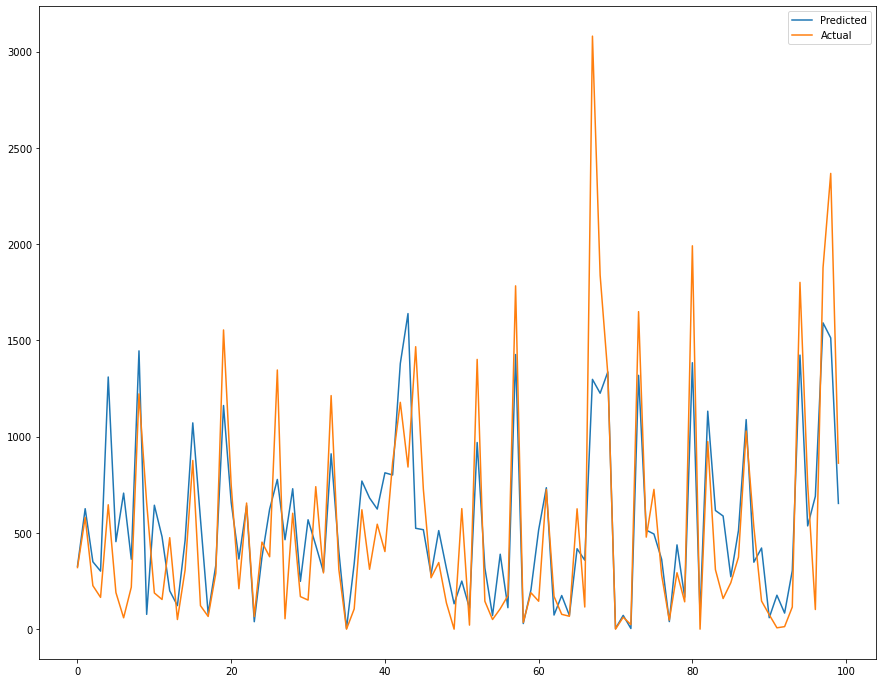

In [ ]:
#plot target test and predicted value for Ridge regression
plt.figure(figsize=(15,12))
plt.plot((y_pred_ridge[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## ElasticNet


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet()
#getting optimum parameters
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
#fitting model
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -53.620001530277


In [ ]:
#prediction for ElasticNet regression
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for ElasticNet regression
result = get_evaluation_matrix(y_test,y_pred_elastic)
score['Elastic net'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net
MSE              174696.237393  175057.634536  174771.535577  175198.731562
RMSE                417.966790     418.398894     418.056857     418.567476
r2                    0.582588       0.581725       0.582408       0.581388
Adjusted r2           0.578739       0.577867       0.578557       0.577527


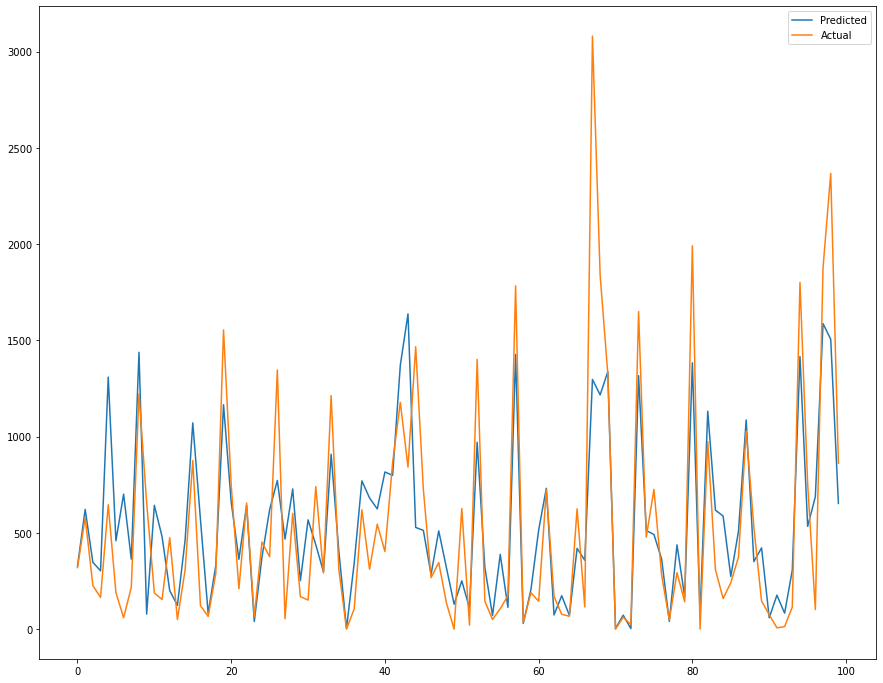

In [ ]:
#plot target test and predicted value for ElasticNet regression
plt.figure(figsize=(15,12))
plt.plot((y_pred_elastic[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

## Descision trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
#fitting model
dt_regeressor = DecisionTreeRegressor(random_state = 100)
dt_regeressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
#prediction for DecisionTree 
y_pred_dt = dt_regeressor.predict(X_test)

In [ ]:
#Evaluation matrices for DecisionTree
result = get_evaluation_matrix(y_test,y_pred_dt)
score['Decision tree'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree  
MSE           75617.154680  
RMSE            274.985735  
r2                0.819324  
Adjusted r2       0.817657  


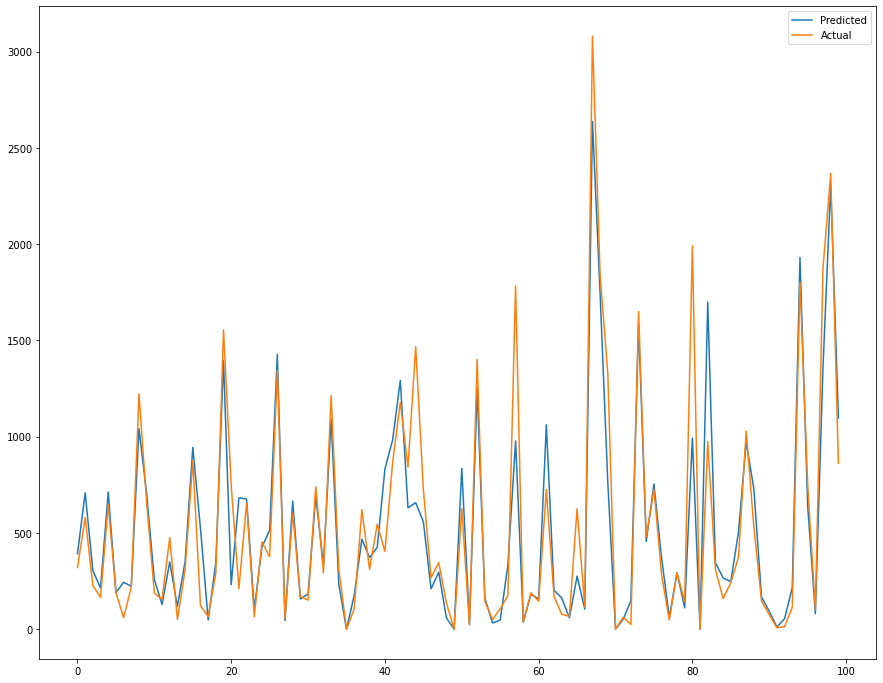

In [ ]:
#plot target test and predicted value for DecisionTree
plt.figure(figsize=(15,12))
plt.plot((y_pred_dt[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_model=BaggingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]

params = {'n_estimators':n_estimators}

In [ ]:
bag_regressor= GridSearchCV(bag_model,param_grid=params,verbose=0)

In [ ]:
#fitting model
bag_regressor.fit(X_train,y_train)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'n_estimators': [80, 100, 150]})

In [ ]:
#prediction for Bagging
y_pred_bag = bag_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for Bagging 
result = get_evaluation_matrix(y_test,y_pred_bag)
score['Bagging'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  
MSE           75617.154680  42446.575701  
RMSE            274.985735    206.025668  
r2                0.819324      0.898580  
Adjusted r2       0.817657      0.897645  


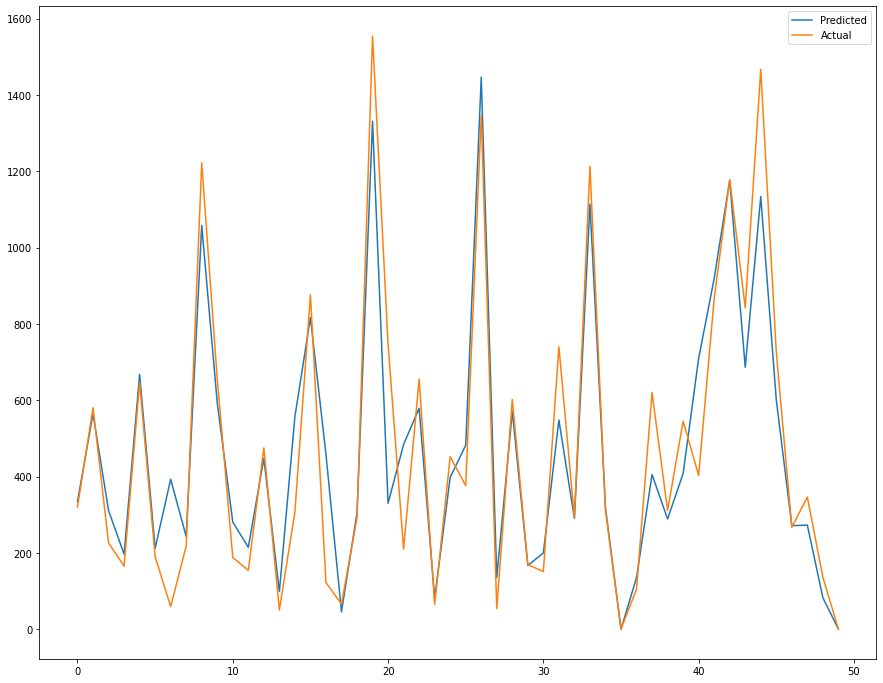

In [ ]:
#plot target test and predicted value for Bagging 
plt.figure(figsize=(15,12))
plt.plot((y_pred_bag[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Random Forest

In [ ]:
#import RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
#fitting model
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#prediction for RandomForest
y_pred_rf = regressor_rf.predict(X_test)

In [ ]:
#Evaluation matrices for RandomForest 
result = get_evaluation_matrix(y_test,y_pred_rf)
score['Random forest'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  Random forest  
MSE           75617.154680  42446.575701   41666.587882  
RMSE            274.985735    206.025668     204.123952  
r2                0.819324      0.898580       0.900444  
Adjusted r2       0.817657      0.897645       0.899526  


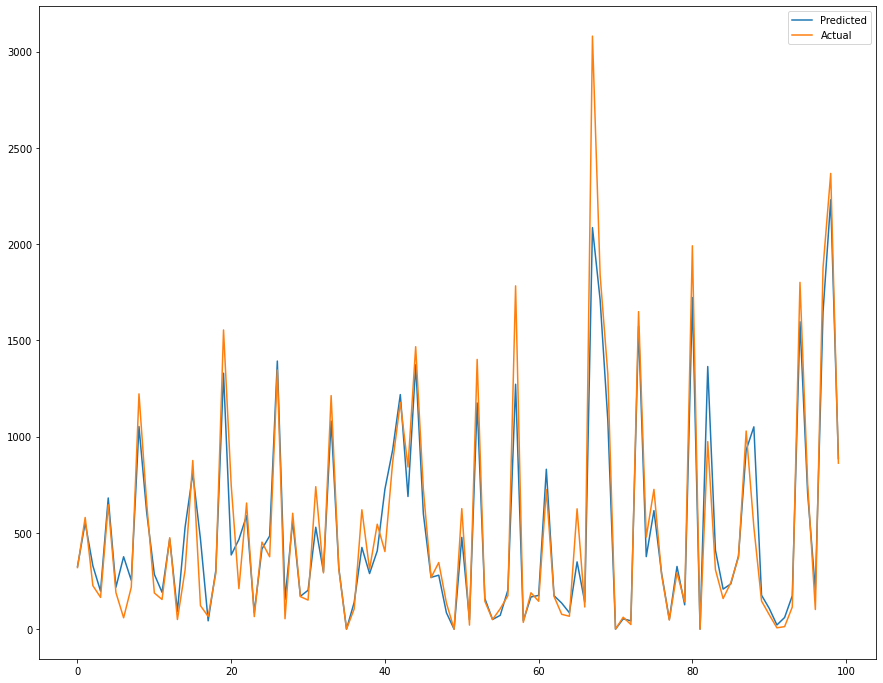

In [ ]:
#plot target test and predicted value for RandomForest 
plt.figure(figsize=(15,12))
plt.plot((y_pred_rf[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Gradient Boosting Regressor

In [ ]:
#import GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_regressor= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [ ]:
#fitting model
gb_regressor.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:
#prediction for GradientBoosting 
y_pred_gb = gb_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for GradientBoosting
result = get_evaluation_matrix(y_test,y_pred_gb)
score['Gradient boosting'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  Random forest  Gradient boosting  
MSE           75617.154680  42446.575701   41666.587882       40776.926199  
RMSE            274.985735    206.025668     204.123952         201.932975  
r2                0.819324      0.898580       0.900444           0.902569  
Adjusted r2       0.817657      0.897645       0.899526           0.901671  


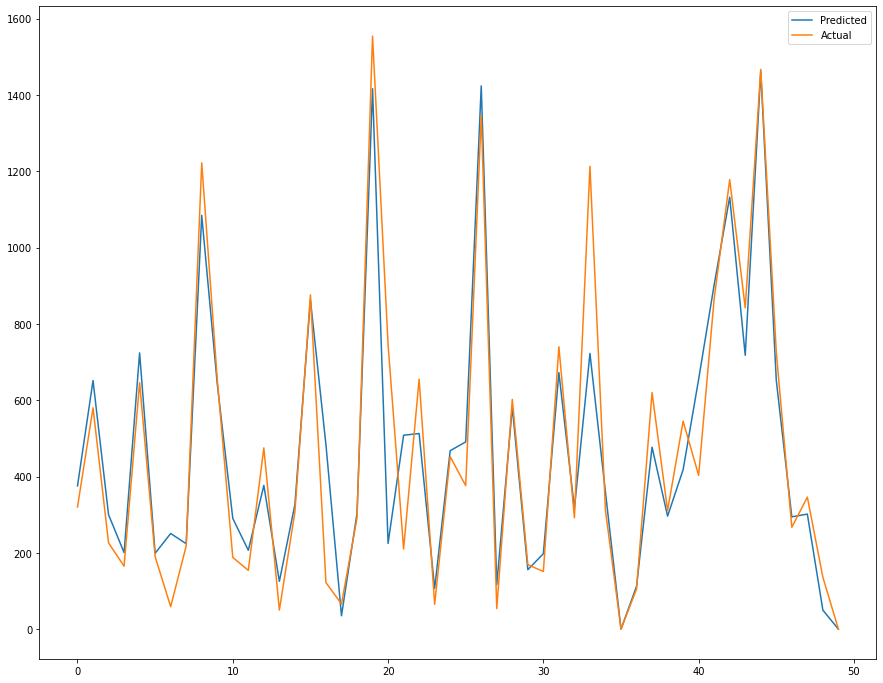

In [ ]:
#plot target test and predicted value for GradientBoosting 
plt.figure(figsize=(15,12))
plt.plot((y_pred_gb[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Extreme Gradient boost

In [ ]:
#import XGBRegressor
from xgboost import XGBRegressor
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_regressor= GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [ ]:
#fitting model
xgb_regressor.fit(X_train,y_train)

[18:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:
#prediction for XGBRegressor
y_pred_xbg = xgb_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for XGBRegressor 
result = get_evaluation_matrix(y_test,y_pred_xbg)
score['Extreme gb'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  Random forest  Gradient boosting  \
MSE           75617.154680  42446.575701   41666.587882       40776.926199   
RMSE            274.985735    206.025668     204.123952         201.932975   
r2                0.819324      0.898580       0.900444           0.902569   
Adjusted r2       0.817657      0.897645       0.899526           0.901671   

               Extreme gb  
MSE          34939.040485  
RMSE           186.919877  
r2               0.916518  
Adjusted r2      0.915748  


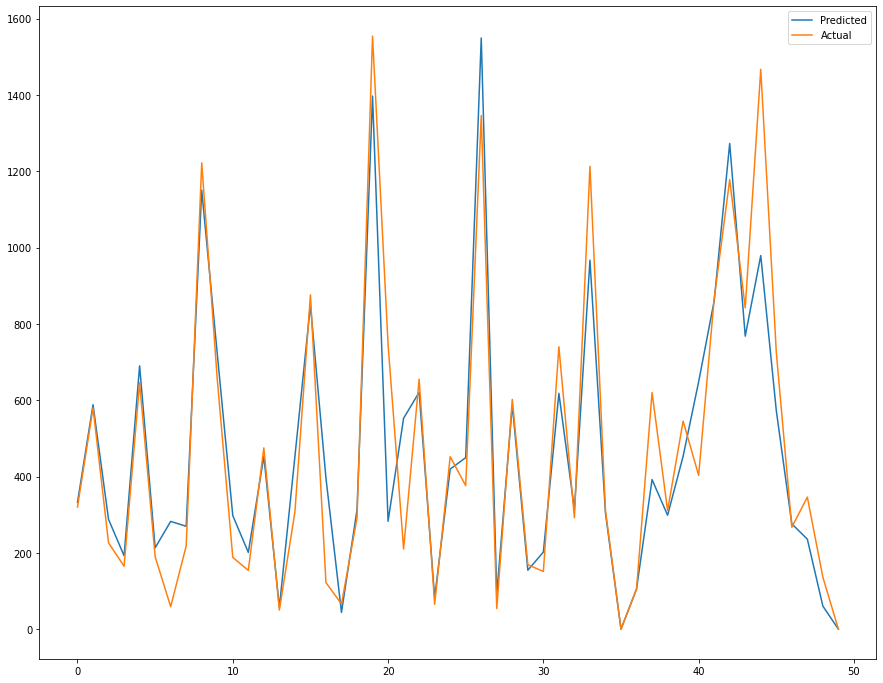

In [ ]:
#plot target test and predicted value for XGBRegressor 

plt.figure(figsize=(15,12))
plt.plot((y_pred_xbg[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

### lightGBR

In [ ]:
#import lgb regressor
import lightgbm as lgb

In [ ]:
lgbr=lgb.LGBMRegressor()

In [ ]:
# finding the best parameters by gridsearchcv
lgb_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgb_regressor=GridSearchCV(estimator=lgbr,param_grid=lgb_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [ ]:
#fitting model
lgb_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
#prediction for lgb 
y_pred_lgb = lgb_regressor.predict(X_test)

In [ ]:
#Evaluation matrices for lgb 
result = get_evaluation_matrix(y_test,y_pred_lgb)
score['Light gb'] = result
print(score)

             Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  Random forest  Gradient boosting  \
MSE           75617.154680  42446.575701   41666.587882       40776.926199   
RMSE            274.985735    206.025668     204.123952         201.932975   
r2                0.819324      0.898580       0.900444           0.902569   
Adjusted r2       0.817657      0.897645       0.899526           0.901671   

               Extreme gb      Light gb  
MSE          34939.040485  33568.364275  
RMSE           186.919877    183.216714  
r2               0.916518      0.919793  
Adjusted r2      0.915748      0.919054  


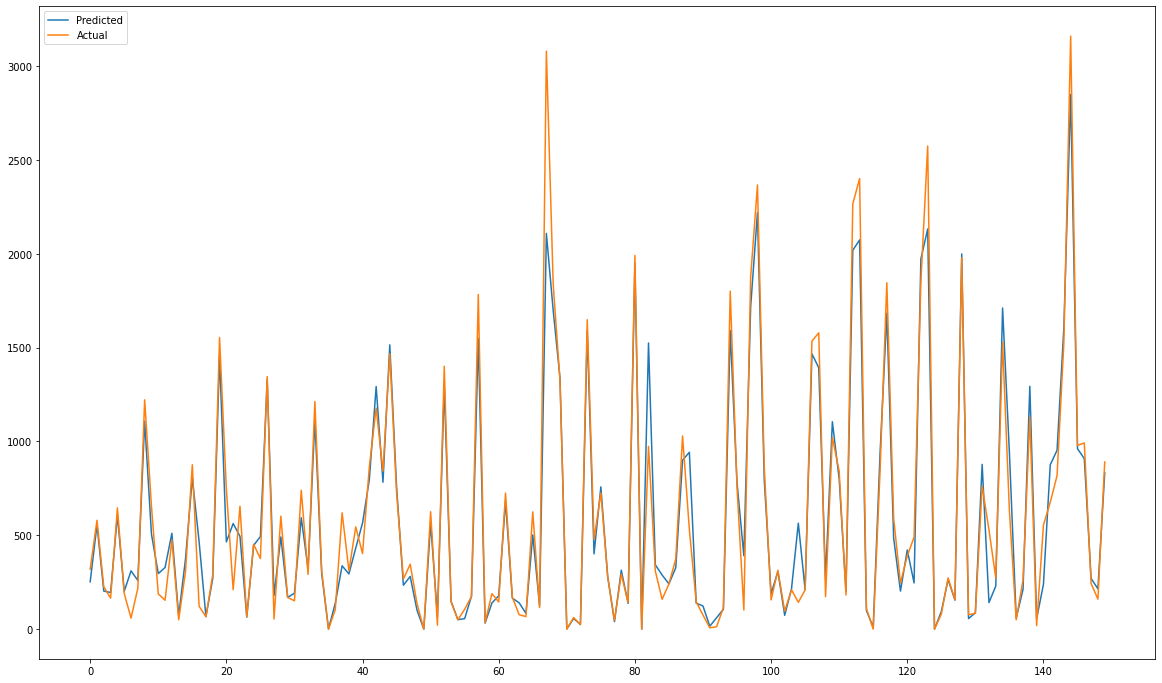

In [ ]:
#plot target test and predicted value for lgb 
plt.figure(figsize=(20,12))
plt.plot((y_pred_lgb[:150])**2)
plt.plot(np.array((y_test[:150])**2))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
score

Linear regression          Lasso          Ridge    Elastic net  \
MSE              174696.237393  175057.634536  174771.535577  175198.731562   
RMSE                417.966790     418.398894     418.056857     418.567476   
r2                    0.582588       0.581725       0.582408       0.581388   
Adjusted r2           0.578739       0.577867       0.578557       0.577527   

             Decision tree       Bagging  Random forest  Gradient boosting  \
MSE           75617.154680  42446.575701   41666.587882       40776.926199   
RMSE            274.985735    206.025668     204.123952         201.932975   
r2                0.819324      0.898580       0.900444           0.902569   
Adjusted r2       0.817657      0.897645       0.899526           0.901671   

               Extreme gb      Light gb  
MSE          34939.040485  33568.364275  
RMSE           186.919877    183.216714  
r2               0.916518      0.919793  
Adjusted r2      0.915748      0.919054

In [ ]:
#all models evaluation matrices
final_matrices=score.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

Models            MSE        RMSE        r2  Adjusted r2
0  Linear regression  174696.237393  417.966790  0.582588     0.578739
1              Lasso  175057.634536  418.398894  0.581725     0.577867
2              Ridge  174771.535577  418.056857  0.582408     0.578557
3        Elastic net  175198.731562  418.567476  0.581388     0.577527
4      Decision tree   75617.154680  274.985735  0.819324     0.817657
5            Bagging   42446.575701  206.025668  0.898580     0.897645
6      Random forest   41666.587882  204.123952  0.900444     0.899526
7  Gradient boosting   40776.926199  201.932975  0.902569     0.901671
8         Extreme gb   34939.040485  186.919877  0.916518     0.915748
9           Light gb   33568.364275  183.216714  0.919793     0.919054

### Lets compare all the model with their permormance

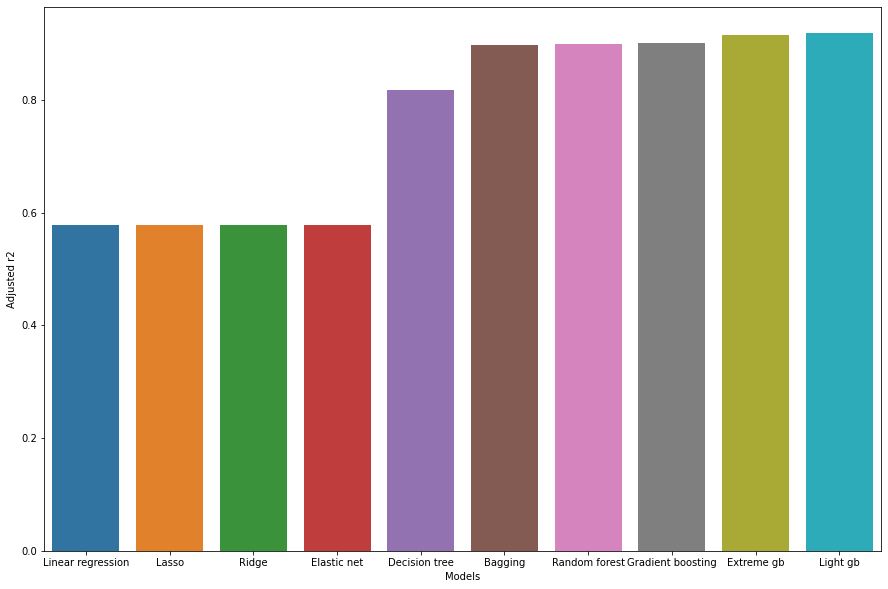

In [ ]:
#plot afj r2 scores for all model
plt.figure(figsize=(15,10))
sns.barplot(x='Models',y='Adjusted r2',data=final_matrices)

### From above chart we can connclude that gradient boosting techniques are performing good and best fits our model

### We can choose Light Gradient Boosting for our model due to its performance score with Adjusted R2 score of 91.9%

### Shap

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
#import shap 
from sklearn.tree import export_graphviz

import shap
import graphviz
sns.set_style('darkgrid')

In [ ]:
for_instance = 3

### For Linear Regression

In [ ]:
# shape for LGB model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_lm = shap.LinearExplainer(reg, X_test)
# obtain shap values for the first row of the test data
lm_shap_values = explainer_lm.shap_values(X_test)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_lm.expected_value, lm_shap_values[0,], X_test.iloc[0,])

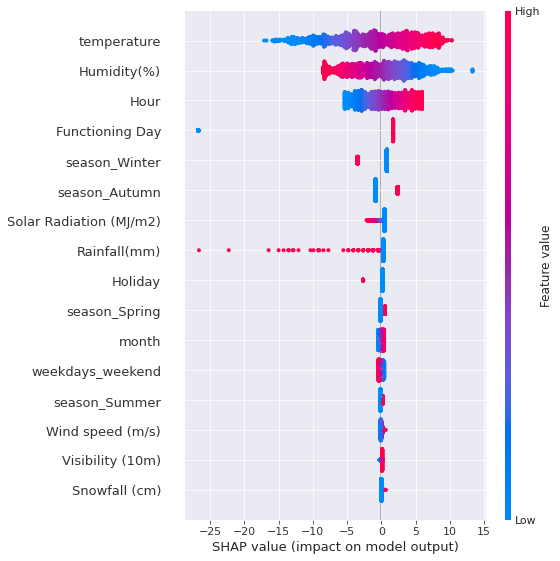

In [ ]:
# Obtain a Scatter Summary Plot 
shap.summary_plot(lm_shap_values, X_test)

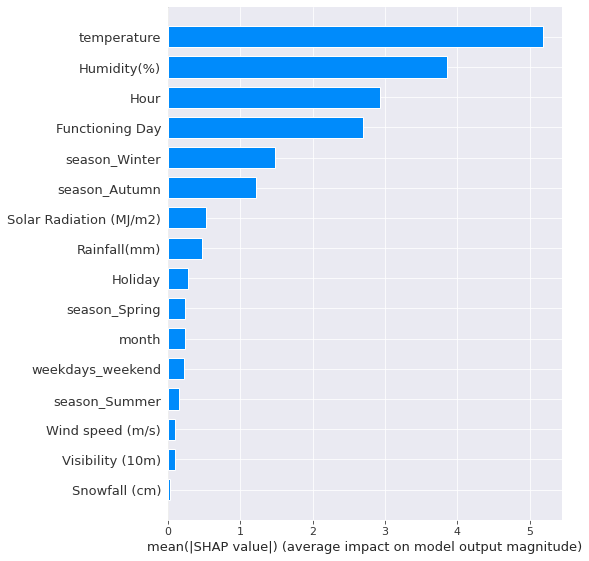

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(lm_shap_values, X_train, plot_type="bar")

### Shap for DT model

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_dt = shap.TreeExplainer(dt_regeressor)
# obtain shap values for the first row of the test data
dt_shap_values = explainer_dt.shap_values(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_dt.expected_value[0], dt_shap_values[0], X_test.iloc[0])

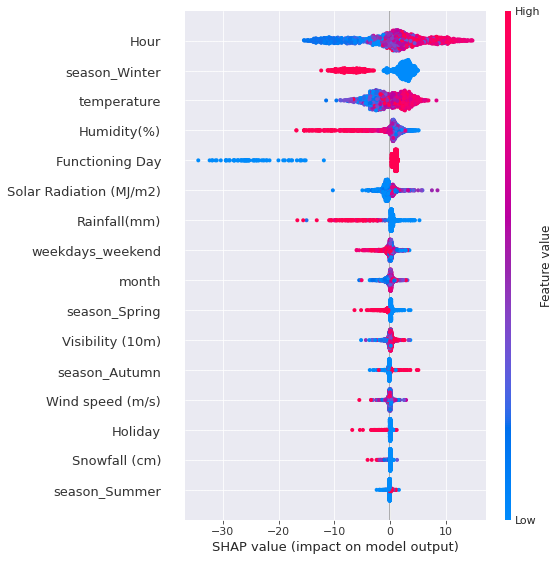

In [ ]:
# Obtain a Scatter Summary Plot 
shap.summary_plot(dt_shap_values, X_test)

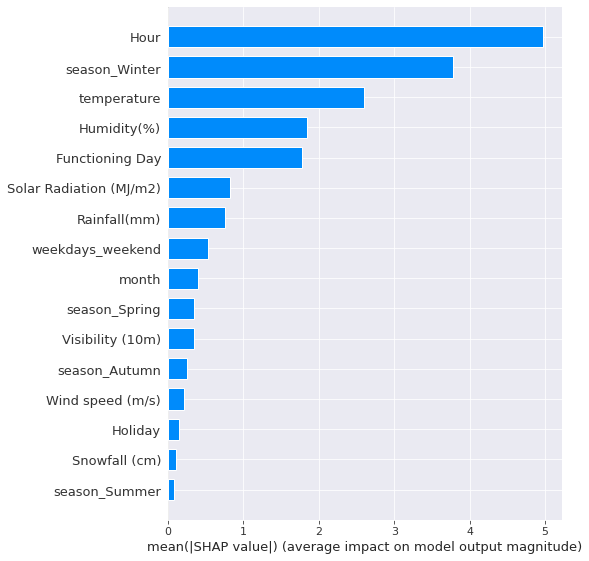

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(dt_shap_values, X_train, plot_type="bar")

### Shap for Random forest model

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_rf = shap.TreeExplainer(regressor_rf)
# obtain shap values for the first row of the test data
rf_shap_values = explainer_rf.shap_values(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer_rf.expected_value[0,], rf_shap_values[0,], X_test.iloc[0,])

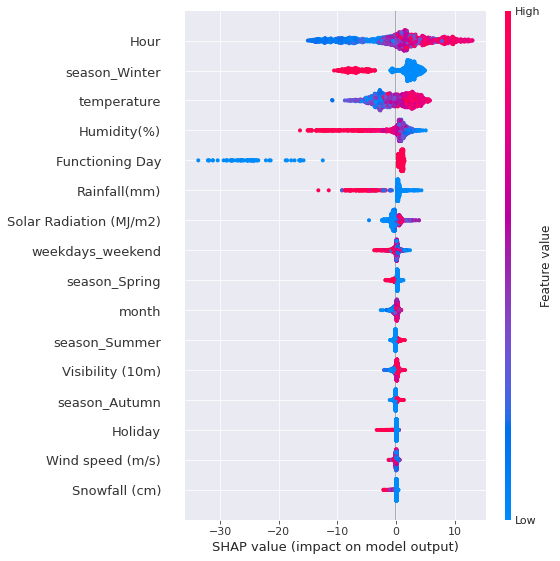

In [ ]:
# Obtain a Scatter Summary Plot 
shap.summary_plot(rf_shap_values, X_test)

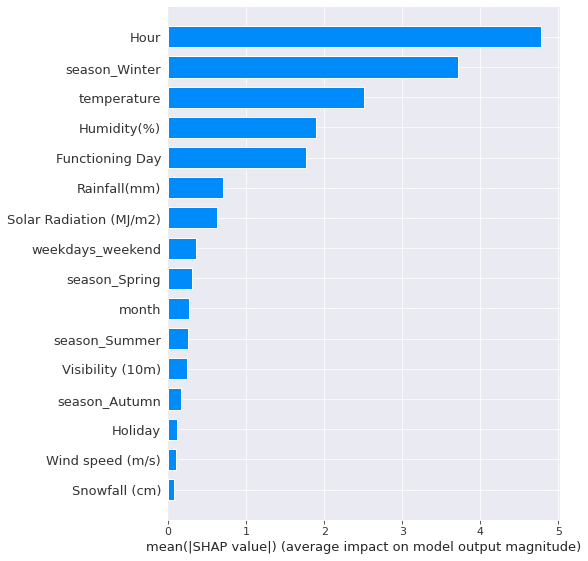

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(rf_shap_values, X_train, plot_type="bar")

###Shap for lightGBM model

In [ ]:
for_instance = 4
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer_lgb = shap.TreeExplainer(lgb_regressor.best_estimator_)
# obtain shap values for the first row of the test data
lgb_shap_values = explainer_lgb(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(lgb_shap_values[for_instance])

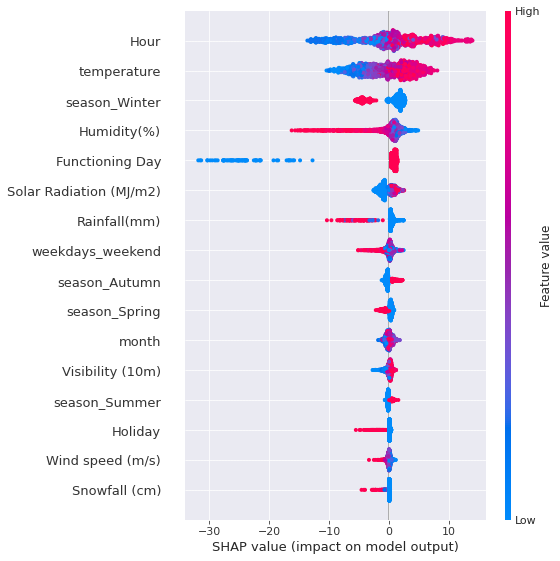

In [ ]:
# Obtain a Scatter Summary Plot 
shap.summary_plot(lgb_shap_values, X_test)

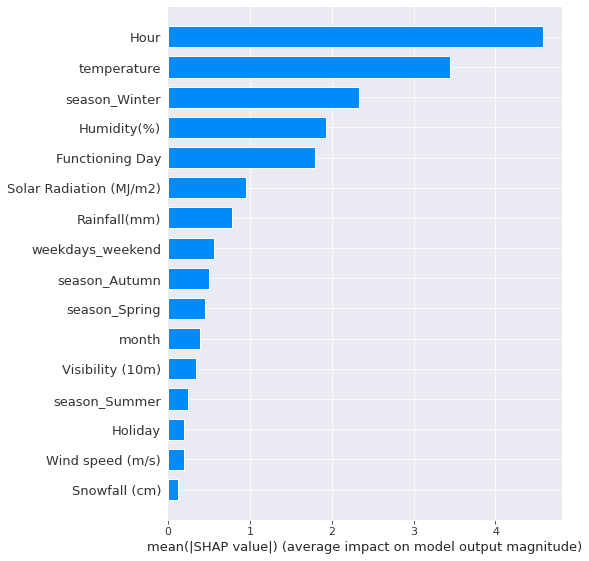

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(lgb_shap_values, X_train, plot_type="bar")

### Eli5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 58.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=251a5a340f40843016342aa0fd95e6b1ae482bed1a09445f2c5506eea218863e
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

###Eli5 for xgboost model

In [ ]:
 
eli.show_prediction(xgb_regressor.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

###Eli5 for lgb model

In [ ]:
#eli5 for lgb model 
eli.show_prediction(lgb_regressor.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

## The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

## The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

## It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.